In [32]:
#Basic and most important Libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#%pip install scikit-learn
#Classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression ,RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#%pip install xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [33]:
#Default theme
sns.set_theme(palette='tab10',
              font="Lucida Calligraphy",
              font_scale=1.0)
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
plt.style.use('dark_background')

In [34]:
df=pd.read_csv('Datasets-main/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df.sample(10).style.background_gradient(cmap='coolwarm')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
290,LP001936,Male,Yes,0,Graduate,No,3075,2416.000000,139.000000,360.000000,1.000000,Rural,Y
367,LP002188,Male,No,0,Graduate,No,5124,0.000000,124.000000,nan,0.000000,Rural,N
371,LP002197,Male,Yes,2,Graduate,No,5185,0.000000,155.000000,360.000000,1.000000,Semiurban,Y
571,LP002847,Male,Yes,nan,Graduate,No,5116,1451.000000,165.000000,360.000000,0.000000,Urban,N
250,LP001835,Male,Yes,0,Not Graduate,No,1668,3890.000000,201.000000,360.000000,0.000000,Semiurban,N
403,LP002300,Female,No,0,Not Graduate,No,1963,0.000000,53.000000,360.000000,1.000000,Semiurban,Y
297,LP001954,Female,Yes,1,Graduate,No,4666,0.000000,135.000000,360.000000,1.000000,Urban,Y
577,LP002874,Male,No,0,Graduate,No,3229,2739.000000,110.000000,360.000000,1.000000,Urban,Y
337,LP002112,Male,Yes,2,Graduate,Yes,2500,4600.000000,176.000000,360.000000,1.000000,Rural,Y
360,LP002161,Female,No,1,Graduate,No,4723,0.000000,81.000000,360.000000,1.000000,Semiurban,N


In [36]:
 df.shape

(614, 13)

In [37]:
df.describe().style.background_gradient(cmap='rainbow')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,65.120410,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [38]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term'] 

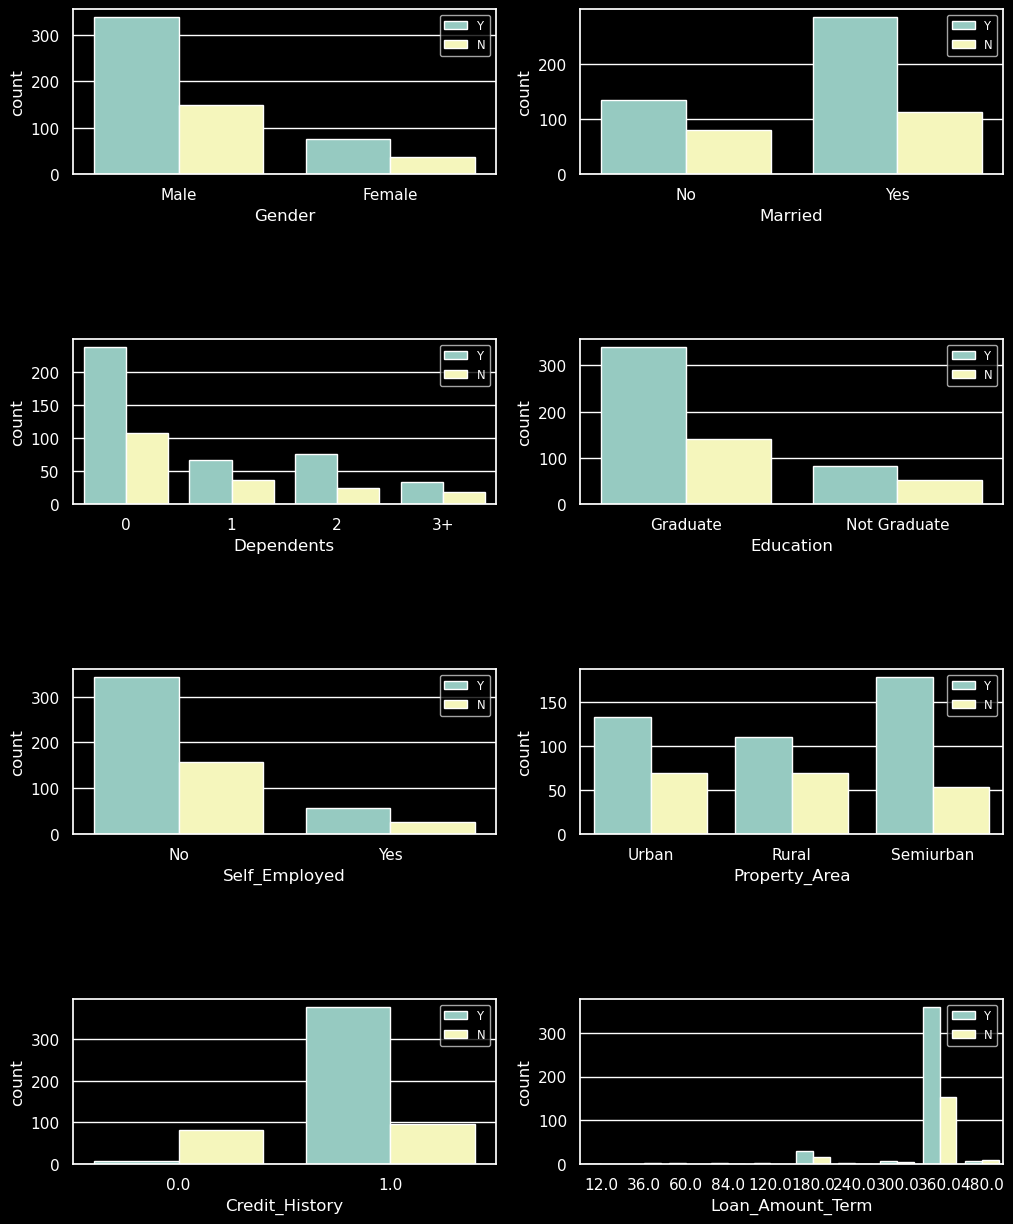

In [39]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row, col])
    axes[row,col].legend(fontsize='small')
    
plt.subplots_adjust(hspace=1)
plt.show()

In [40]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


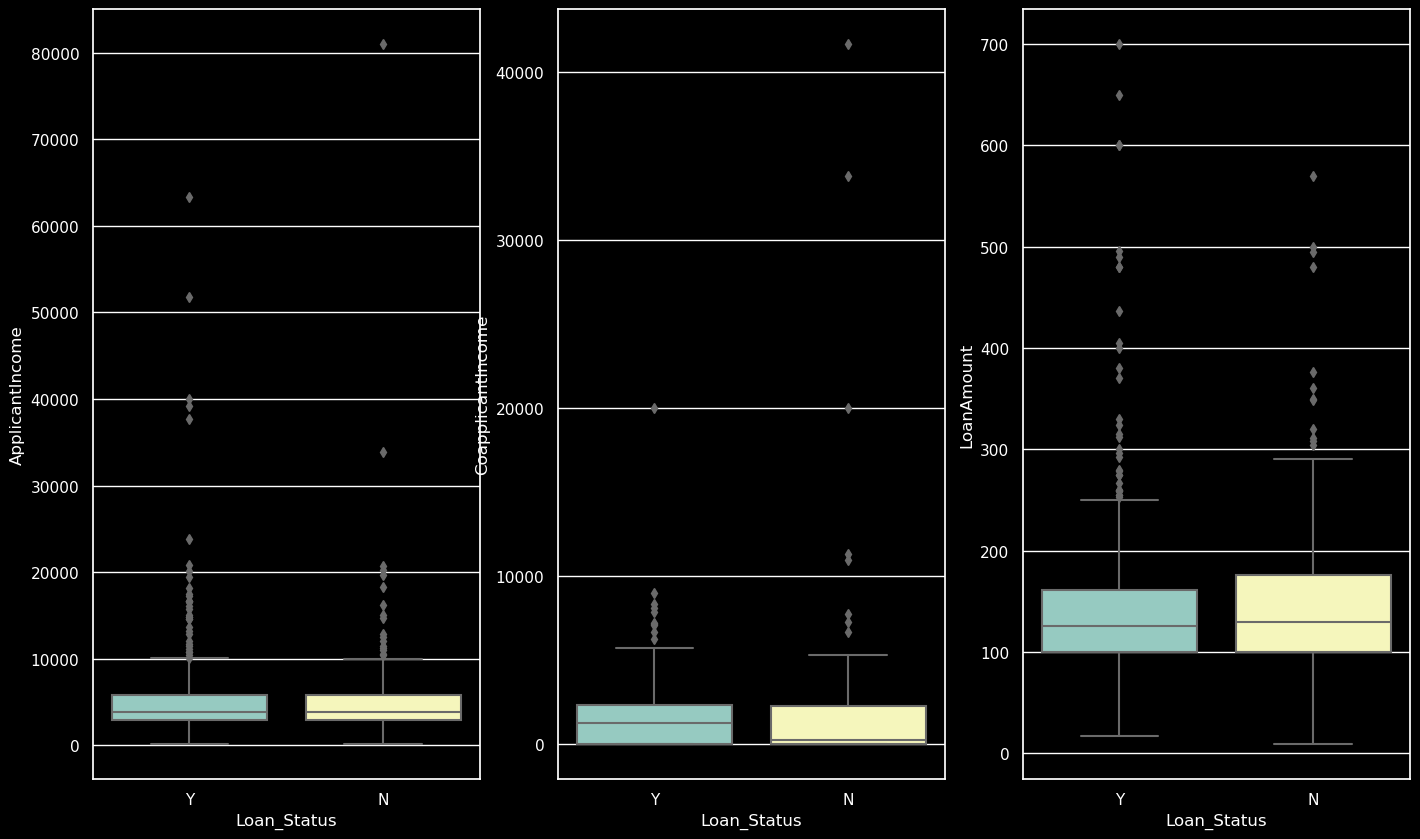

In [41]:
fig,axes = plt.subplots(1,3,figsize=(17,10))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col, data=df, x='Loan_Status', ax=axes[idx])
    
print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

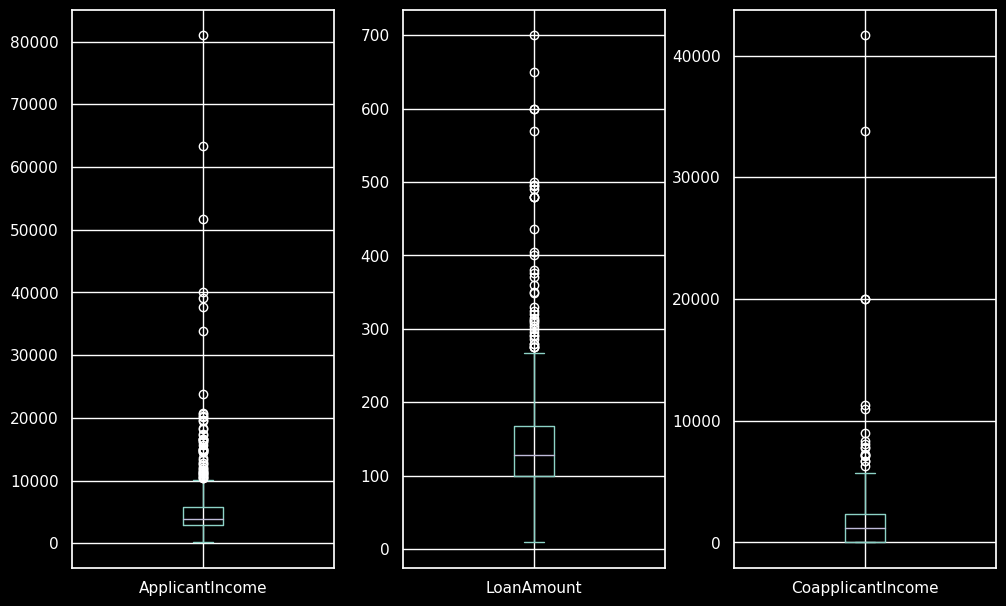

In [42]:
plt.subplot(131)
df['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
df['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
df['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

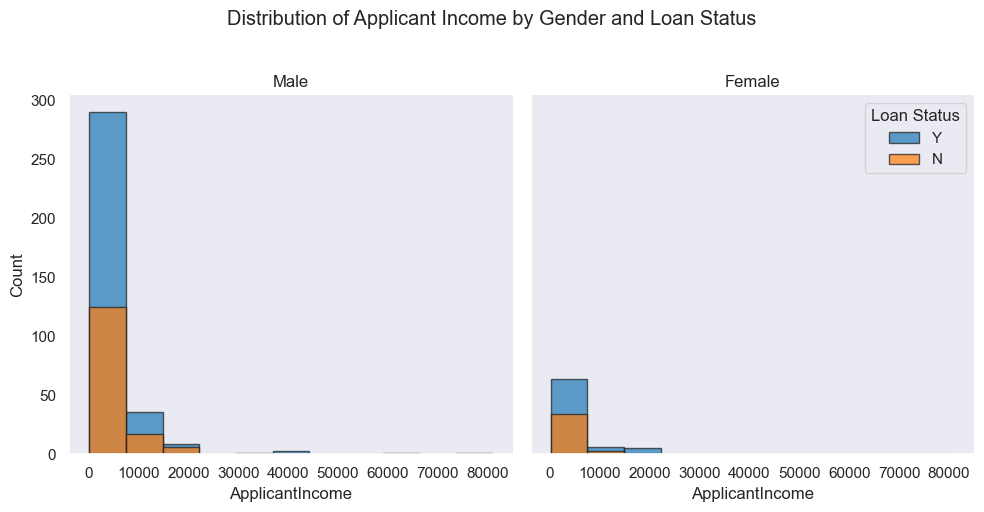

In [43]:
custom_palette = sns.color_palette("tab10", 2)
bins = np.linspace(df['ApplicantIncome'].min(), df['ApplicantIncome'].max(), 12)
sns.set(style="dark")
graph = sns.FacetGrid(df, col='Gender', hue ="Loan_Status", palette=custom_palette, col_wrap=2, height=5)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k", alpha=0.7)
graph.set_titles(col_template="{col_name}")
graph.axes[-1].legend(title="Loan Status", loc="upper right")
graph.set_axis_labels("ApplicantIncome", "Count")
graph. fig.suptitle("Distribution of Applicant Income by Gender and Loan Status", y=1.02)
plt. tight_layout ()
plt.show()

In [44]:
correlation_mat=df.corr()

<AxesSubplot:>

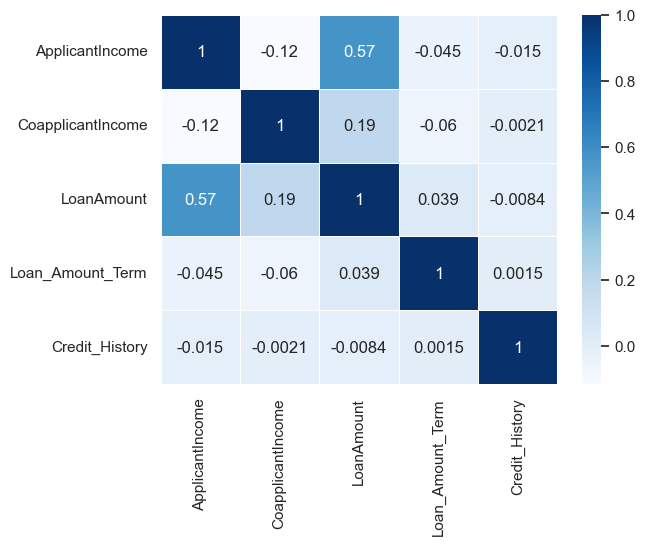

In [45]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="Blues")

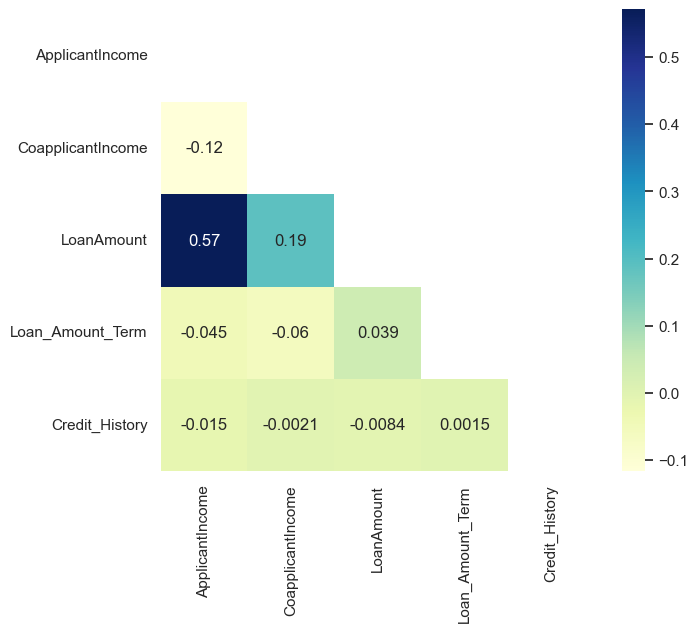

In [46]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f, ax=plt.subplots(figsize=(7,6))
    ax=sns.heatmap(correlation_mat, mask=mask,annot=True,cmap='YlGnBu')

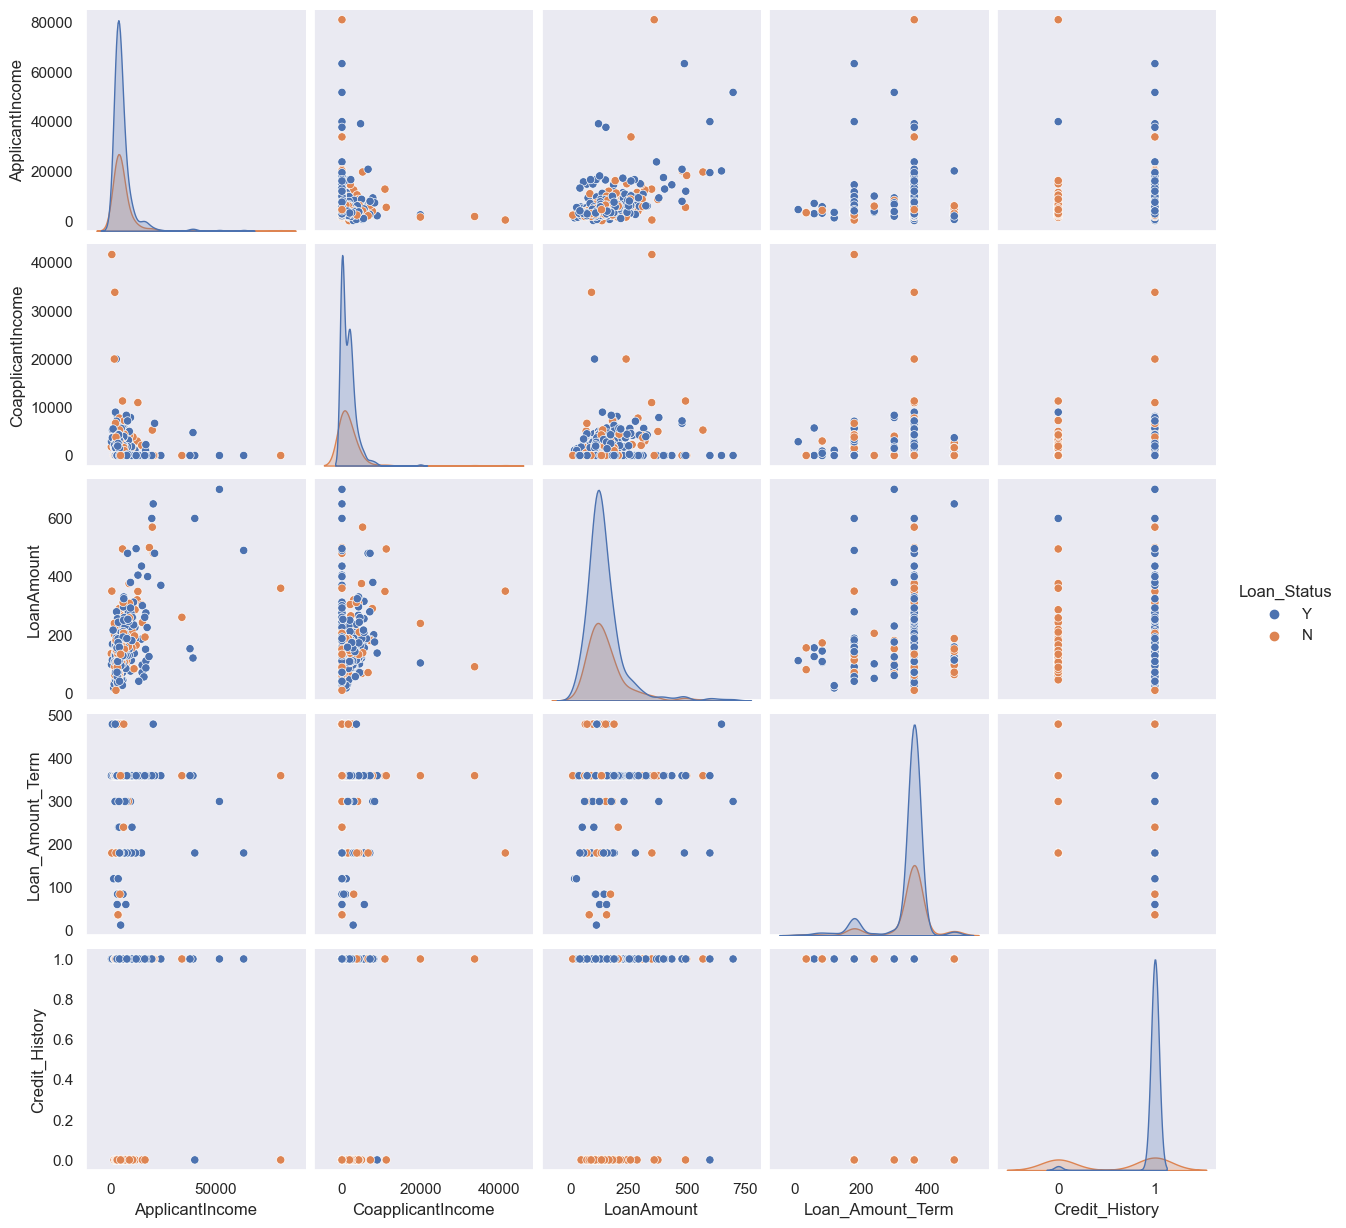

In [47]:
sns.pairplot(df,hue='Loan_Status')

In [48]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

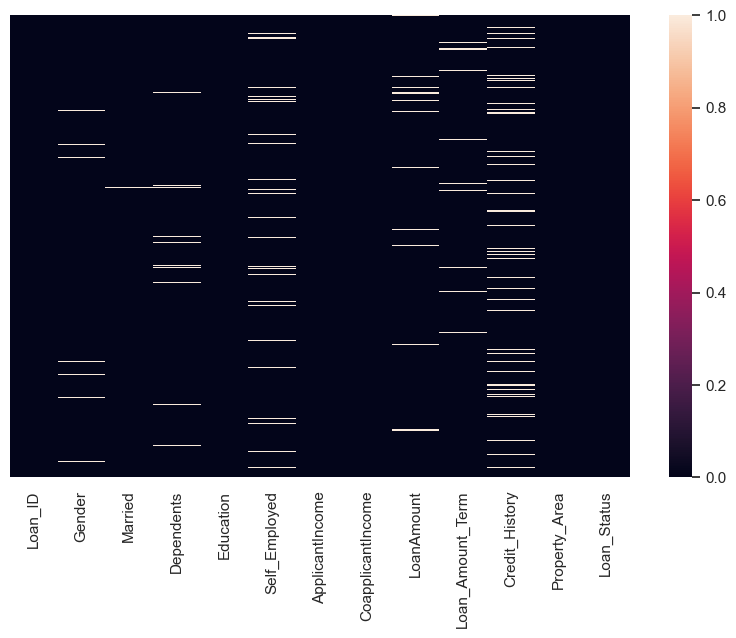

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [51]:
print("Data distribution analysis:->--------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(df['ApplicantIncome']))
print("CoapplicantIncome: ",np.mean(df['CoapplicantIncome']))
print("LoanAmount: ",np.mean(df['LoanAmount']))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(df['ApplicantIncome'])[0])
print("CoapplicantIncome: ",stats.mode(df['CoapplicantIncome'])[0])
print("LoanAmount: ",stats.mode(df['LoanAmount'])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(df['ApplicantIncome']))
print("CoapplicantIncome: ",np.median(df['CoapplicantIncome']))
print("LoanAmount: ",np.median(df['LoanAmount']))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(df['ApplicantIncome']))
print("CoapplicantIncome: ",np.std(df['CoapplicantIncome']))
print("LoanAmount: ",np.std(df['LoanAmount']))

Data distribution analysis:->--------------------------------------


Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.245798027101
LoanAmount:  146.41216216216216

Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [nan]

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  nan

Standard Deviation:->

ApplicantIncome:  6104.064856533888
CoapplicantIncome:  2923.8644597700627
LoanAmount:  85.51500809120331


In [52]:
fig = px.histogram(df["ApplicantIncome"],x = "ApplicantIncome", y= "ApplicantIncome")
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(df["CoapplicantIncome"],x = "CoapplicantIncome", y= "CoapplicantIncome")
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(df["LoanAmount"],x = "LoanAmount", y= "LoanAmount")
fig.update_layout(title="LoanAmount")
fig.show()

## Not normaly distributed

#### Prepare data for model training i.e. removing outliers, filling null values, removing skewness

In [53]:
print(df["Gender"].value_counts())
print(df["Married"].value_counts())
print(df["Self_Employed"].value_counts())
print(df["Dependents"].value_counts())
print(df["Credit_History"].value_counts())
print(df["Loan_Amount_Term"].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<AxesSubplot:>

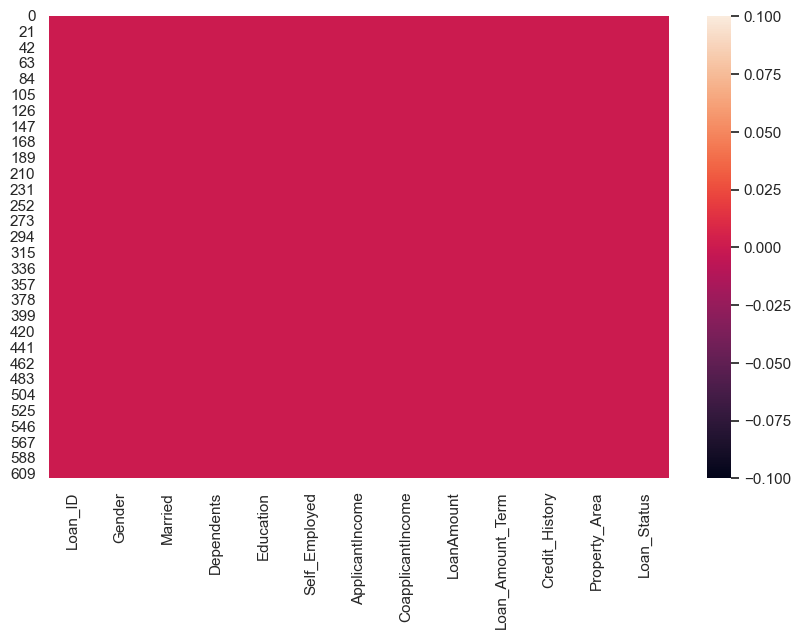

In [54]:
#filling all Nan values with mode of respective variable
df['Gender'].fillna(df["Gender"].mode()[0],inplace=True)
df['Married'].fillna(df["Married"].mode()[0],inplace=True)
df['Self_Employed'].fillna(df["Self_Employed"].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df['Dependents'].fillna(df["Dependents"].mode()[0],inplace=True)
df['Credit_History'].fillna(df["Credit_History"].mode()[0],inplace=True)

# all values of "Dependents" column were of "str" from now converting to "int" form
df["Dependents"]=df["Dependents"].replace('3+',int(3))
df["Dependents"]=df["Dependents"].replace('1',int(1))
df["Dependents"]=df["Dependents"].replace('2',int(2))
df["Dependents"]=df["Dependents"].replace('0',int(0))

df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

print(df.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [55]:
#Treating outliers and converting data to normal distribution
#Before removing outlier

print("Data distribution analysis:->--------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(df['ApplicantIncome']))
print("CoapplicantIncome: ",np.mean(df['CoapplicantIncome']))
print("LoanAmount: ",np.mean(df['LoanAmount']))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(df['ApplicantIncome'])[0])
print("CoapplicantIncome: ",stats.mode(df['CoapplicantIncome'])[0])
print("LoanAmount: ",stats.mode(df['LoanAmount'])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(df['ApplicantIncome']))
print("CoapplicantIncome: ",np.median(df['CoapplicantIncome']))
print("LoanAmount: ",np.median(df['LoanAmount']))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(df['ApplicantIncome']))
print("CoapplicantIncome: ",np.std(df['CoapplicantIncome']))
print("LoanAmount: ",np.std(df['LoanAmount']))

Data distribution analysis:->--------------------------------------


Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.245798027101
LoanAmount:  145.75244299674267

Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [128.]

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  128.0

Standard Deviation:->

ApplicantIncome:  6104.064856533888
CoapplicantIncome:  2923.8644597700627
LoanAmount:  84.03871423798938


In [56]:
#getting log value:->

df["ApplicantIncome"]=np.log(df["ApplicantIncome"])
#as "CoapplicantIncome" columns has some "0" values we will get log values except "0"
df["CoapplicantIncome"]=[np.log(i) if i!=0 else 0 for i in df["CoapplicantIncome"]]
df["LoanAmount"]=np.log(df["LoanAmount"])

In [57]:
print("Data distribution analysis:->--------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(df['ApplicantIncome']))
print("CoapplicantIncome: ",np.mean(df['CoapplicantIncome']))
print("LoanAmount: ",np.mean(df['LoanAmount']))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(df['ApplicantIncome'])[0])
print("CoapplicantIncome: ",stats.mode(df['CoapplicantIncome'])[0])
print("LoanAmount: ",stats.mode(df['LoanAmount'])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(df['ApplicantIncome']))
print("CoapplicantIncome: ",np.median(df['CoapplicantIncome']))
print("LoanAmount: ",np.median(df['LoanAmount']))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(df['ApplicantIncome']))
print("CoapplicantIncome: ",np.std(df['CoapplicantIncome']))
print("LoanAmount: ",np.std(df['LoanAmount']))

Data distribution analysis:->--------------------------------------


Mean:->

ApplicantIncome:  8.341213093227005
CoapplicantIncome:  4.289733227820405
LoanAmount:  4.8572501948110895

Mode:->

ApplicantIncome:  [7.82404601]
CoapplicantIncome:  [0.]
LoanAmount:  [4.85203026]

Median:->

ApplicantIncome:  8.246040412315828
CoapplicantIncome:  7.080283635438671
LoanAmount:  4.852030263919617

Standard Deviation:->

ApplicantIncome:  0.6447375297521025
CoapplicantIncome:  3.8725225987499146
LoanAmount:  0.49559166063018056


In [58]:
fig = px.histogram(df["ApplicantIncome"],x = "ApplicantIncome", y= "ApplicantIncome")
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(df["CoapplicantIncome"],x = "CoapplicantIncome", y= "CoapplicantIncome")
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(df["LoanAmount"],x = "LoanAmount", y= "LoanAmount")
fig.update_layout(title="LoanAmount")
fig.show()

In [59]:
df["Gender"]=le.fit_transform(df["Gender"])
df["Married"]=le.fit_transform(df["Married"])
df["Education"]=le.fit_transform(df["Education"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])

# df = pd.get_dummies(df)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


In [60]:
X = df.drop(["Loan_Status","Loan_ID"], axis=1)
Y = df["Loan_Status"]

Gender --> 0.023329593
Married --> 0.043940842
Dependents --> 0.03970982
Education --> 0.05890409
Self_Employed --> 0.047676113
ApplicantIncome --> 0.0486292
CoapplicantIncome --> 0.054745004
LoanAmount --> 0.049085066
Loan_Amount_Term --> 0.051258586
Credit_History --> 0.5376038
Property_Area --> 0.04511782


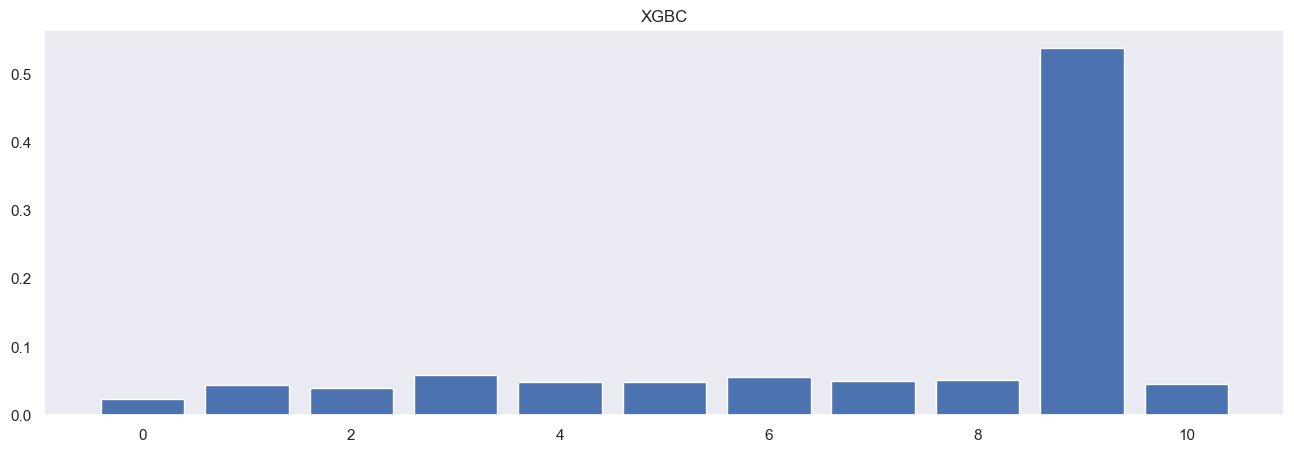

Feature importance by random forest:->

Gender --> 0.018271167299318918
Married --> 0.02398722504330406
Dependents --> 0.048198508633198626
Education --> 0.02465595038267245
Self_Employed --> 0.01732066895993826
ApplicantIncome --> 0.20839468288104762
CoapplicantIncome --> 0.1185060713436323
LoanAmount --> 0.18566493034706563
Loan_Amount_Term --> 0.04227897908131883
Credit_History --> 0.26585976066708
Property_Area --> 0.04686205536142335


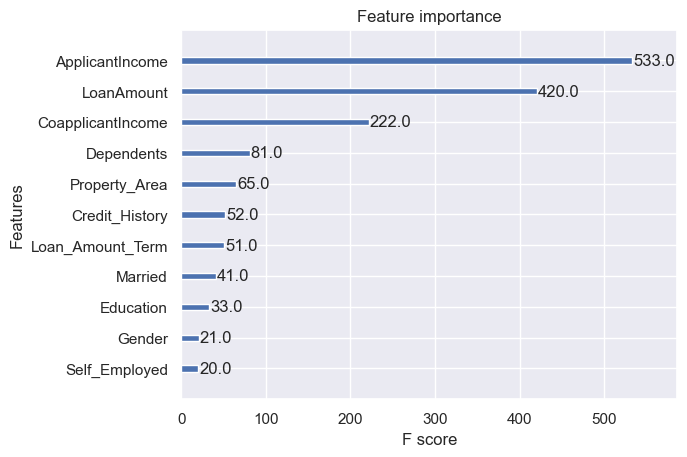

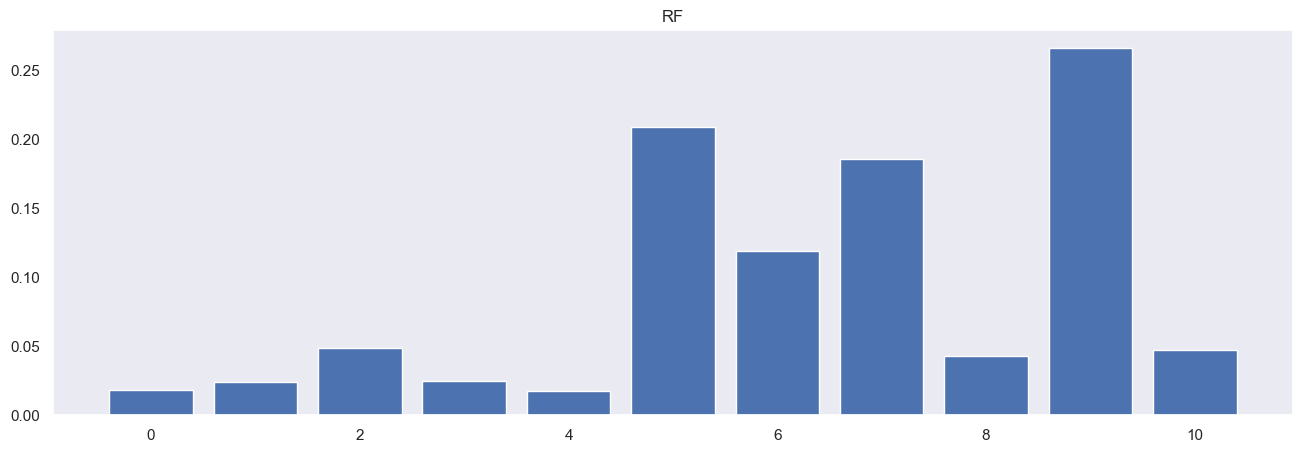

Feature importance by decision tree:->

Gender --> 0.01077760224679656
Married --> 0.013169088111200888
Dependents --> 0.06193265629058288
Education --> 0.018950464562856168
Self_Employed --> 0.029500077578424735
ApplicantIncome --> 0.21459057936812967
CoapplicantIncome --> 0.1019225562254245
LoanAmount --> 0.18717892411735235
Loan_Amount_Term --> 0.037267746049320136
Credit_History --> 0.2922008668920113
Property_Area --> 0.03250943855790096


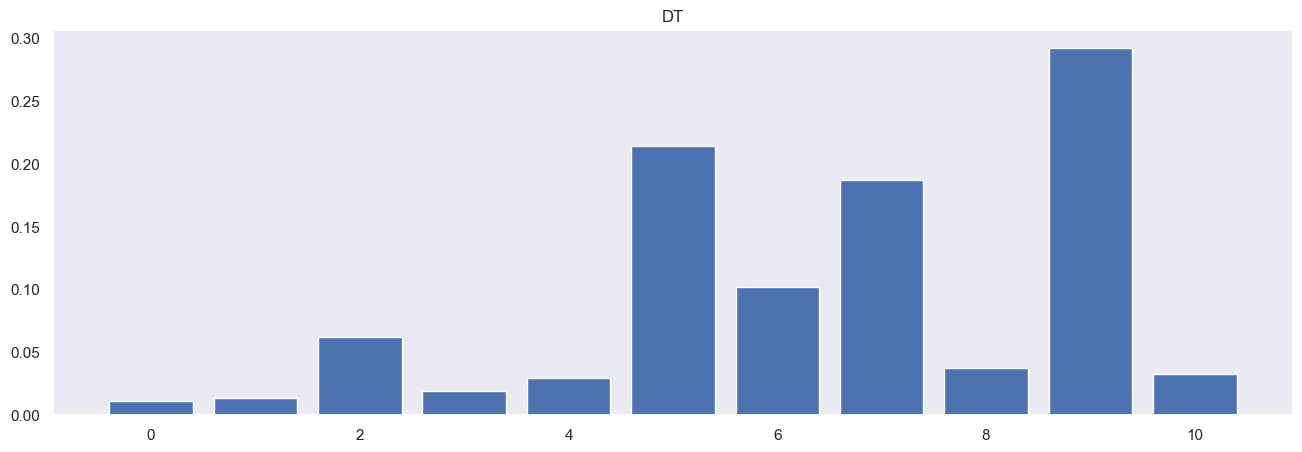

Feature importance by Support Vector Machine:->

Gender --> -0.011118064711792108
Married --> 0.016446275142516953
Dependents --> -0.00040107009190838965
Education --> -0.007861829798480713
Self_Employed --> -0.00445004539884053
ApplicantIncome --> 0.009519789949195001
CoapplicantIncome --> 0.0009463876354458326
LoanAmount --> -0.01279619269789034
Loan_Amount_Term --> 8.919517392769194e-05
Credit_History --> 2.081228877425726
Property_Area --> -0.0006494364958493813


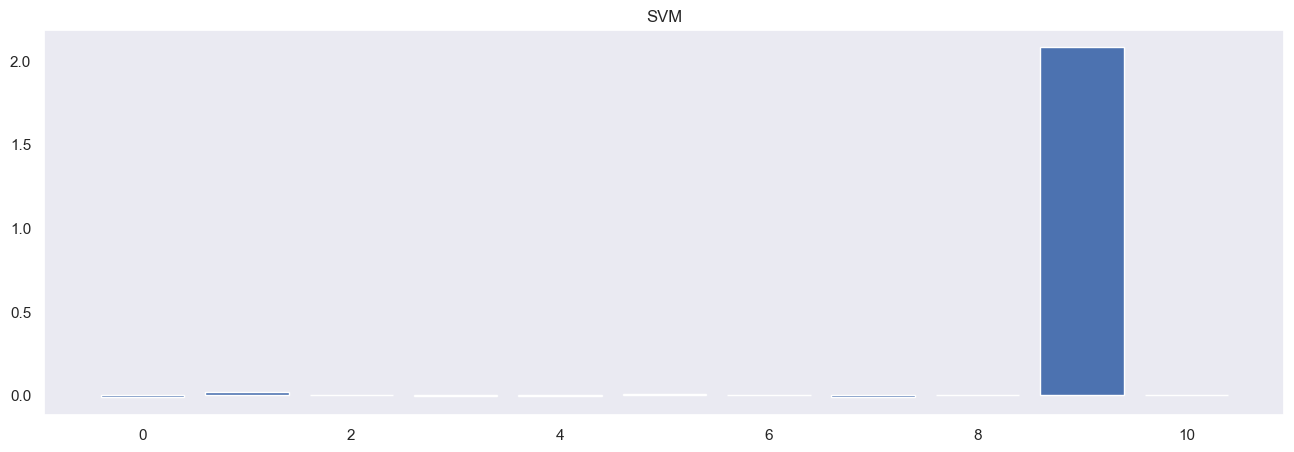

Feature importance by Logistic Regression:->

Gender --> -0.16198225480101835
Married --> 0.4337126644455665
Dependents --> 0.059520603919216125
Education --> -0.4144441886531207
Self_Employed --> 0.043357150592779954
ApplicantIncome --> 0.10203638136260945
CoapplicantIncome --> 0.04569449681428494
LoanAmount --> -0.5525029232086033
Loan_Amount_Term --> -0.001230145074317842
Credit_History --> 3.2823485665160184
Property_Area --> 0.05926128517380729


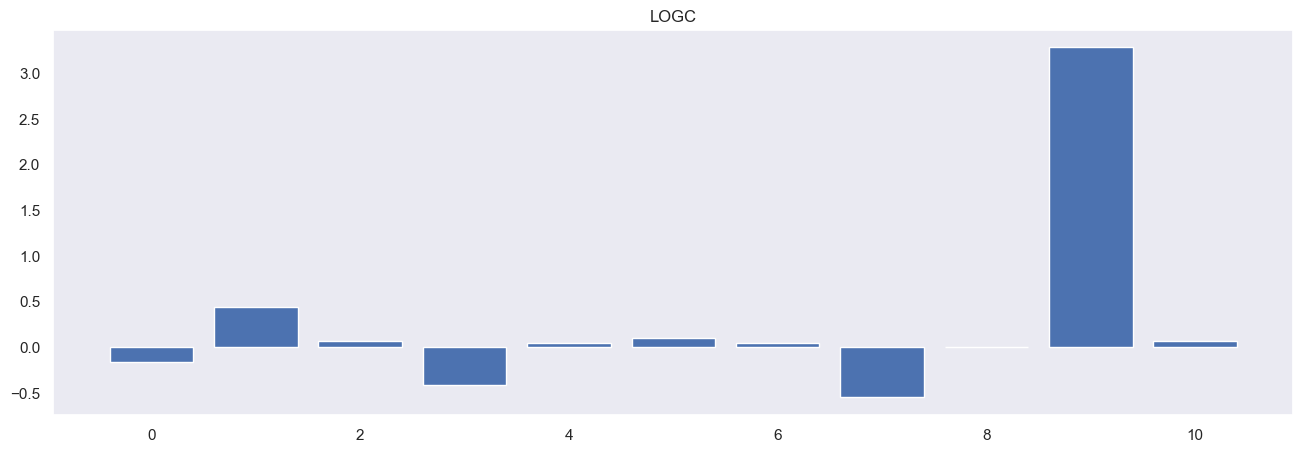

In [61]:
XGBR = XGBClassifier()
XGBR.fit(X,Y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"-->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

print("Feature importance by random forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,Y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"-->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by decision tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,Y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"-->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Support Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,Y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"-->",j)
plt.figure(figsize=(16,5))
plt.title(label="SVM")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,Y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"-->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()